<a href="https://colab.research.google.com/github/jumbokh/ML-Class/blob/main/notebook/DNN_MNIST_%E6%9C%80%E7%B2%BE%E7%B0%A1%E7%89%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  DNN
1. 課程介紹了 
  * Neurons, layers 與 Fully Connected
  * 圖案
  * 資料的流動與運算
  * 三個步驟學習了辨識
1. 實踐程式的 idea 是從題目到資料到模型到訓練
  * 題目資料是從 keras 的 datasets 中取出
  * 我們會對資料整理好，讓他吻合模型框架的輸入需求。**其中我們會介紹 one hot encoding**
  * 進入第一步驟：建一個模型，基本上的 constrain 是輸入與輸出的大小格式。
  * 第二步：loss 寫在 compile() 裡頭。
  * 第三步：gradient descent 也寫在 compile() 裡頭。
  * 訓練時，我們需要放入多少(哪些）資料？（hint: 我們是監督式學習）
1. 比較細或可以多說明的參數有： 
  * activation 通常用到的有 relu, sigmoid, softmax 
  * loss = 'categorical_crossentropy', 'binary_crossentropy', 'sparse_categorical_crossentropy', 'mse'
  * optimizer 常用的有 adam, sgd, rmsprop, adagrad 等
  * validation_split: chap 3 有介紹
  * batch_size 
  * metrics
  * verbose
  * epochs


In [ ]:
#%tensorflow_version 1.x
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from keras.datasets import mnist, fashion_mnist   # cifar10, cifar100, fashion_mnist(or mnist_fashion)
from keras.utils import np_utils  
from keras.models import Sequential, Model
from keras.layers import Dense #, Conv2D, LSTM
# from keras.utils.vis_utils import plot_model

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() 


11501568/11490434 [==============================] - 0s 0us/step


0
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


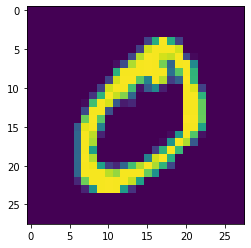

In [ ]:
X_train.shape #(60000, 28, 28)
X_Train = X_train.reshape(60000,784)
X_Train.shape
X_Train[1]
plt.imshow(X_train[1])
print(y_train[1])
#[1, 0, 0, 0, ..., 0] # 0
#[0, 0, 0, 0, 0, 1, ] # 5
y_Train = np_utils.to_categorical(y_train,10)
print(y_Train[0])

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
X_Train = X_train.reshape(60000,784)
X_Test = X_test.reshape(10000,784)

X_Train = X_Train/255
X_Test = X_Test/255
# 我要將標籤改成獨熱 One Hot Encoding
y_Train = np_utils.to_categorical(y_train,10)
# One Hot Encoding 
# 在 kmean 中如果同學有嘗試 分成三類、五類，然後觀察與思考，應該會發現照片資料的相似度跟答案大小順序無關
y_Test = np_utils.to_categorical(y_test, 10)
# 基本上訓練資料如何處理，測試資料送進模型函式前也是要完成相同的處理

In [ ]:
model = Sequential()
model.add(Dense(250, input_dim=784, activation='sigmoid'))  
#model.add(Dense(128, activation = 'relu')) 
#model.add(Dense(252, activation = 'relu'))
# (250000, relu, adam, bs = 200: 7s)
# (250000, sigmoid, adam, bs = 200: 7s)
# (250000, sigmoid, sgd, bs = 200: 5s)
# (250000, sigmoid, sgd, bs = 10: 36s)

model.add(Dense(10, activation='softmax'))
#plot_model(model)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 250)               196250    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2510      
Total params: 198,760
Trainable params: 198,760
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer ="adam", metrics=['accuracy'])
# loss = 'mse', optimizer = 'rmsprop'
train_history=model.fit(x=X_Train, y=y_Train,validation_split=0.2, epochs=20, batch_size=100, verbose=2)
# validation_split = 0 ? batch_size = 50000

Epoch 1/20
480/480 - 3s - loss: 0.5203 - accuracy: 0.8679 - val_loss: 0.2851 - val_accuracy: 0.9202
Epoch 2/20
480/480 - 1s - loss: 0.2637 - accuracy: 0.9243 - val_loss: 0.2225 - val_accuracy: 0.9398
Epoch 3/20
480/480 - 1s - loss: 0.2089 - accuracy: 0.9397 - val_loss: 0.1858 - val_accuracy: 0.9482
Epoch 4/20
480/480 - 1s - loss: 0.1714 - accuracy: 0.9499 - val_loss: 0.1634 - val_accuracy: 0.9538
Epoch 5/20
480/480 - 1s - loss: 0.1424 - accuracy: 0.9588 - val_loss: 0.1443 - val_accuracy: 0.9589
Epoch 6/20
480/480 - 1s - loss: 0.1221 - accuracy: 0.9650 - val_loss: 0.1345 - val_accuracy: 0.9604
Epoch 7/20
480/480 - 1s - loss: 0.1047 - accuracy: 0.9701 - val_loss: 0.1181 - val_accuracy: 0.9645
Epoch 8/20
480/480 - 1s - loss: 0.0904 - accuracy: 0.9750 - val_loss: 0.1127 - val_accuracy: 0.9657
Epoch 9/20
480/480 - 1s - loss: 0.0780 - accuracy: 0.9786 - val_loss: 0.1046 - val_accuracy: 0.9703
Epoch 10/20
480/480 - 1s - loss: 0.0681 - accuracy: 0.9814 - val_loss: 0.0956 - val_accuracy: 0.9719

In [ ]:
train_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

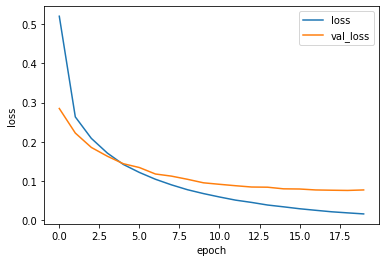

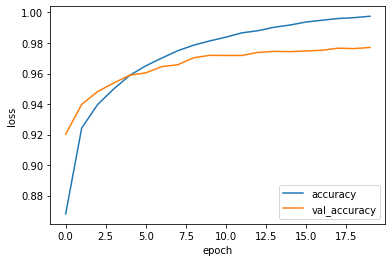

In [ ]:
plt.plot(train_history.epoch, train_history.history['loss'], label ='loss')
plt.plot(train_history.epoch, train_history.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc = 1)
plt.show()
plt.plot(train_history.epoch, train_history.history['accuracy'], label ='accuracy')
plt.plot(train_history.epoch, train_history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc = 4)
plt.show()

In [ ]:
eva = model.evaluate(X_Test, y_Test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0713 - accuracy: 0.9782


In [ ]:
print(model.predict(np.expand_dims(X_Test[0], 0)), '\n')
#np.argmax(model.predict(x), axis=-1)
print(f" prediction is {np.argmax(model.predict(np.expand_dims(X_Test[0], 0)))} \n")
print(f" label is {y_test[0]}")

#pred = print(f" prediction is {model.predict_classes(X_Test[:1])} \n")
## warnings.warn('`model.predict_classes()` is deprecated and '
pred = print(f" prediction is {model.predict(X_Test[:1]).argmax()} \n")

[[2.2171687e-07 6.6814188e-08 1.1503739e-05 8.5166737e-04 2.7976219e-10
  5.1308991e-08 2.3827372e-12 9.9913496e-01 2.6915285e-07 1.3850291e-06]] 

 prediction is 7 

 label is 7
 prediction is 7 



# 在我們所謂的訓練過程中沒有用到 測試資料
# 在我們的訓練過程中，我們用到的是訓練資料，同時還把訓練資料拆分出訓練資料與驗證資料。

#[ 練習 20 分鐘]

1. 增加神經元層
1. 更改 loss = 'rmsprop'
1. 更改 verbose = 0, or 1
1. 更改 hidden layers' activation to 'relu'
1. model.summary()的參數量是怎麼得出的？

# 以下參考



*   Neural Network Basic
*   Practice Colab
> * Enable Runtime/Change Runtime Type/GPU
> * Check the 3rd icon (folder icon) at left bar
> * To add Code, Text in 2 methods
> * To Run a code in 2 ways
> * To connect linux system, working directory to gdrive
> * To download/upload files through the 3rd icon at left bar or colab.files
* To define MNIST Problem, to observe data, and to pre-process data
* To build the most simple NN, and familiar with def. loss fct, gradient decent

# 從認識深度網路的觀點，程式的學習點
> 1. ## 觀察輸入資料的格式與要求得的資料的格式設計
> 1. ## 設計網路需考慮輸出入資料格式的配合，很可能是最資料做好處理送入網路
> 1. ## 介紹 np_utils.to_categorical
> 1. ## 嘗試配合底下兩個步驟程序
>> * #### 模型、好壞、梯度下降
>> * #### model.add、model.compile(loss, optimizer)、model.fit(2 data, pb_strategy 
> 1. 其他，為什麼知道這些 import
>> * 用 keras: 有 models
>> * 用 keras: 有 layers
>> * 經驗
>> * google

## 這個程式沒有用到 子目錄資料，主要是利用 keras 裡的 api 上網取得資料

# Import Libraies

##【練習】
### 基本上我們剛開始寫程式時，並不知道有那些 api 要引用，我們常常是參考別人的 code，理解後內化成我們的知識與能力，根據程式目標來了解有那些套件需要引用，有時候沒記得清楚，就請用 keywords 在 google 搜尋。
### 【練習】**套件功能說明，同時說明為什麼這個程式需要用到這些套件。**

# 【步驟 1】 載入資料


1.   ### **載入資料**
2.   資料前處理 (Preprocessing)

1.   建模型
2.   設定損失函式、決定梯度下降法
1.   訓練



In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### xyxy, vs. xxyy <== 這是？

In [ ]:
(X_train_image, y_train_label),(X_test_image, y_test_label) = mnist.load_data()

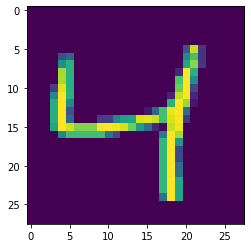

In [ ]:
X_train_image
import matplotlib.pyplot as plt
plt.imshow(X_train_image[2])

In [ ]:
X_train_image.shape

(60000, 28, 28)

In [ ]:
X_train_image[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

# 步驟 2 資料前處理 (Preprocessing)


1.   載入資料
2.   ### **資料前處理 (Preprocessing)**

1.   建模型
2.   設定損失函式、決定梯度下降法
1.   訓練


In [ ]:
X_train_image.shape  #(60000,28,28)
a=X_train_image.reshape(60000, 28*28)
a.shape

(60000, 784)

In [ ]:
# 我們沒有要用 CNN, 所以先轉成 一維

X_Train = X_train_image.reshape(60000,784).astype('float32')
X_Test = X_test_image.reshape(10000,784).astype('float32')

In [ ]:
X_Train = X_Train/255
X_Test = X_Test/255

In [ ]:
y_train_label[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
y_Train = np_utils.to_categorical(y_train_label)
# One Hot Encoding 
y_Test = np_utils.to_categorical(y_test_label)

In [ ]:
y_Train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

##【練習】

1.   ## 為什麼要做 one hot encoding?
2.   ## 上面有 
> *   #### X_train_image, y_train_label,X_test_image, y_test_label
> *   #### X_Train，X_Test, 
> *   ####  y_Train, y_Test Indented block
## 各代表甚麼資料，都是甚麼類型，甚麼維度。有沒有更好的寫法。







    

# 步驟 3 DNN Model

1.   載入資料
2.   資料前處理 (Preprocessing)

1.   ### **建模型**
2.   設定損失函式、決定梯度下降法
1.   訓練


In [ ]:
model = Sequential()
model.add(Dense(4, input_dim=784, activation='relu'))   
model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation= 'relu'))
model.add(Dense(10, activation='softmax'))                   
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 3140      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 10)                50        
Total params: 3,230
Trainable params: 3,230
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
model.add(Dense(250, input_dim=784, activation='relu'))   
# input = 784, output = 250 <== define 2 layers: input and the first layer
#model.add(Dense(250, activation = 'sigmoid'))
model.add(Dense(128, activation= 'relu'))
model.add(Dense(10, activation='softmax'))                   # input = 500, output = 10
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 250)               196250    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32128     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 229,668
Trainable params: 229,668
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

#keras.utils.plot_model(model, show_shapes=True, to_file='model.png')

## 【參數計算】

In [ ]:
print(f'parameter number of dense_1 layer is, {784*256+256}')
print(f'parameter number of dense_2 layer is, {256*128+128}')
print(f'parameter number of dense_3 layer is, 填填看')

parameter number of dense_1 layer is, 200960
parameter number of dense_2 layer is, 32896
parameter number of dense_3 layer is, 填填看


# 步驟 4 設定損失函式、決定梯度下降法

1.   載入資料
2.   資料前處理 (Preprocessing)

1.   建模型
2.   ### **設定損失函式、決定梯度下降法**
1.   訓練



In [ ]:
model.compile(loss='categorical_crossentropy', optimizer ="adam", metrics=['accuracy'])

# 步驟 5 訓練

1.   載入資料
2.   資料前處理 (Preprocessing)

1.   建模型
2.   設定損失函式、決定梯度下降法
1.   ### **訓練**


In [ ]:
train_history=model.fit(x=X_Train, y=y_Train,validation_split=0.2, epochs=10, batch_size=200, verbose=2)

Epoch 1/10
240/240 - 1s - loss: 0.3503 - accuracy: 0.9028 - val_loss: 0.1615 - val_accuracy: 0.9545
Epoch 2/10
240/240 - 1s - loss: 0.1304 - accuracy: 0.9613 - val_loss: 0.1095 - val_accuracy: 0.9680
Epoch 3/10
240/240 - 1s - loss: 0.0841 - accuracy: 0.9750 - val_loss: 0.0985 - val_accuracy: 0.9702
Epoch 4/10
240/240 - 1s - loss: 0.0601 - accuracy: 0.9825 - val_loss: 0.1012 - val_accuracy: 0.9700
Epoch 5/10
240/240 - 1s - loss: 0.0463 - accuracy: 0.9859 - val_loss: 0.0853 - val_accuracy: 0.9748
Epoch 6/10
240/240 - 1s - loss: 0.0343 - accuracy: 0.9901 - val_loss: 0.0801 - val_accuracy: 0.9768
Epoch 7/10
240/240 - 1s - loss: 0.0245 - accuracy: 0.9932 - val_loss: 0.0753 - val_accuracy: 0.9774
Epoch 8/10
240/240 - 1s - loss: 0.0198 - accuracy: 0.9946 - val_loss: 0.0806 - val_accuracy: 0.9771
Epoch 9/10
240/240 - 1s - loss: 0.0154 - accuracy: 0.9962 - val_loss: 0.0888 - val_accuracy: 0.9763
Epoch 10/10
240/240 - 1s - loss: 0.0119 - accuracy: 0.9968 - val_loss: 0.0922 - val_accuracy: 0.9766

In [ ]:
train_history.history['val_loss']

[0.16149237751960754,
 0.10945989936590195,
 0.09849631786346436,
 0.10123103111982346,
 0.08533880859613419,
 0.08007189631462097,
 0.07530603557825089,
 0.08058597892522812,
 0.08881579339504242,
 0.09221766144037247]

# 預測

In [ ]:
pred_test = np.argmax(model.predict(X_Test[0:50]), axis = 1)
print(pred_test)
print(y_test_label[0:50])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4]


In [ ]:
pred_test_simple = model.predict(X_Test[0:2])
print(pred_test_simple)

[[8.2727392e-10 1.8782504e-08 4.1427217e-07 1.1157947e-06 1.5954067e-12
  1.2656687e-10 3.5514428e-14 9.9999845e-01 3.7915857e-09 7.2372819e-09]
 [2.9411805e-12 9.8611990e-09 9.9999988e-01 4.0266215e-10 8.1255348e-17
  7.7835897e-14 3.7023548e-12 3.8503628e-15 8.4313406e-08 1.8988667e-13]]


【練習】

2. ## check train_history.history
3. ## 理解 train_history.history 的 dictionary 結構，利用結構搭配 matplotlib.pyplot 畫出訓練過程的 loss 與 val_loss

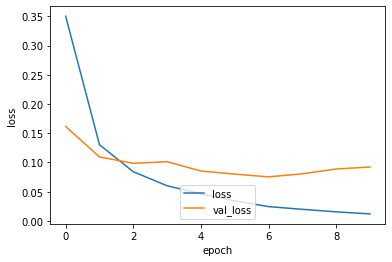

In [ ]:
plt.plot(train_history.epoch, train_history.history['loss'], label ='loss')
plt.plot(train_history.epoch, train_history.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc = 8)
plt.show()

# 『練習』

* 加或修改 layers, 

* 改變 gpu mode, 增加 epochs

* loss = 'sparse_categorical_crossentropy' with metric = ['sparse_categorical_accuracy']?
* loss = 'mse'

* sigmoid?

* dataset: cifar100

# 評估

In [ ]:
eva = model.evaluate(X_Test, y_Test)
print(f"loss in model is, {eva[0]}")
print(f"accuracy of model is, {eva[1]}")

pred_test_proba=model.predict(X_Test[0:3])
print(pred_test_proba)  # model.predcit 一樣，但是跟 ML's sklearn 不一樣嗎?

313/313 [==============================] - 1s 2ms/step - loss: 0.0784 - accuracy: 0.9781
loss in model is, 0.0783998966217041
accuracy of model is, 0.9781000018119812
[[8.2727392e-10 1.8782504e-08 4.1427217e-07 1.1157947e-06 1.5954067e-12
  1.2656687e-10 3.5514428e-14 9.9999845e-01 3.7915857e-09 7.2372819e-09]
 [2.9411805e-12 9.8611990e-09 9.9999988e-01 4.0266215e-10 8.1255348e-17
  7.7835897e-14 3.7023548e-12 3.8503628e-15 8.4313406e-08 1.8988667e-13]
 [2.4508945e-06 9.9518824e-01 6.9077843e-04 3.9334518e-06 8.0776612e-05
  3.7182231e-06 3.6788162e-05 4.8753509e-04 3.5054269e-03 2.5939030e-07]]


## 單一資料預測需要有第一維度指出資料筆數編號。

In [ ]:
model.predict(np.expand_dims(X_Test[0],axis=0)) 

array([[8.2727392e-10, 1.8782504e-08, 4.1427259e-07, 1.1157947e-06,
        1.5954098e-12, 1.2656687e-10, 3.5514428e-14, 9.9999845e-01,
        3.7915857e-09, 7.2372819e-09]], dtype=float32)

# [練習]


```
(train_x, train_y),(test_x, test_y) = fashion_mnist.load_data()
```





```
import cv2
from PIL import Image
def imgtest(jpegfile):
    filename = colabok  + jpegfile+'.png'
    #print(filename)
    img = Image.open(filename)
    img = img.resize((28,28), Image.BILINEAR)
    filename = colabok+ jpegfile+'r.png'
    img.save(filename)
    img = cv2.imread(filename)
    img=img[:,:,0]
    img = 1-img
    img784 = img.reshape(1,784)
    img784 = img784/255
    img = img/255
    plt.imshow(img)
    Prediction_s = model.predict_classes(img784)
    #plot_image(img)
    return img, Prediction_s
```



```
print('Oh ~~ ')
x, pred_b=imgtest('DNN_8r')
print(pred_b)

plt.imshow(x)
plt.show()
#plt.imshow(X_Test[0].reshape(28,28))
#plt.show
```





# 練習與觀察 1:

    原本 
    model = Sequential()
    model.add(Dense(units=256,input_dim=784,kernel_initializer ='normal', activation ='relu'))  
    model.add(Dense(units=10, kernel_initializer='normal',activation='softmax'))
    為幾個 hidden layers?
    
    
    改為 
    model = Sequential()
    model.add(Dense(units=10,input_dim=784, activation='softmax'))  
    為幾個 hidden layers?
    
    結果為何？

# 練習與觀察 2:
    原本 與處理的 normalization
    X_Train = X_Train/255
    X_Test = X_Test/255
    
    如果被 Remark，
    結果如何觀察？


# 練習與觀察 3:
    原本 
    model = Sequential()
    model.add(Dense(units=256,input_dim=784,kernel_initializer ='normal', activation ='relu'))  
    model.add(Dense(units=10, kernel_initializer='normal',activation='softmax'))
    為幾個 hidden layers?


    改為 
    model = Sequential()
    model.add(Dense(units=256,input_dim=784,kernel_initializer ='normal', activation ='sigmoid'))  
    model.add(Dense(units=10, kernel_initializer='normal',activation='softmax'))
    結果為何？

# 練習與觀察 4:
    其他觀察：
        以上改變有沒有造成訓練時間變化？
        reset 後 重跑training格子,  與不 reset 再多跑幾次 training 格子，結果是怎樣？
        validation_split = 0.1 會發生什麼狀況？
        reset 後, epochs 改為 1, , 3, 7, 10, 15, 20 去觀察 big0.jpg 的結果
        batch_size =100, 200, 300 的觀察
        verbose = 0, 1, 2
        
### 每次改變後，請記得改回原本得值~~

    esc +b
    esc +m
    esc +y
    esc +x
    esc +h
    esc +a
    
    command + s
    
    control + enter
    control + alt
    tab
    shif + tab 
    ?...
    !ls
    !rm
    !cd
    %
    
    ctrl + enter